# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [1]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler, MinMaxScaler


### Exploring The Data

In [2]:
# # Read dataset - Suicide Rates (menggantikan dataset spotify_songs yang terlalu sulit untuk dirapihkan)
df = pd.read_csv('/content/drive/MyDrive/dataset_ml/suicide.csv', sep = ';')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# select with no duplicated data
df = df[~df.duplicated()]

In [5]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.8+ MB


In [6]:
# Number of Unqie Value in Every Columns
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

### Describe The Data

In [7]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156.624.900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156.624.900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156.624.900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156.624.900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156.624.900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63.067.077.179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63.067.077.179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63.067.077.179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63.067.077.179,2309,Generation Z


## Data collection

In [9]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/dataset_ml/suicide.csv', delimiter=';', dtype=str)

column_names = datasets_1[0]
data = datasets_1[1:]

df = pd.DataFrame(data, columns=column_names)

In [10]:
from numpy import unique
for i in range(df.shape[1]):
    if len(unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(unique(df.iloc[:, i])))

0 101
1 32
2 2
3 6
4 2084
5 25564
6 5298
7 2321
8 306
9 2321
10 2233
11 6


In [11]:
print(df.shape)
for a in column_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(27820, 12)
(27820, 12)
(27820, 12)


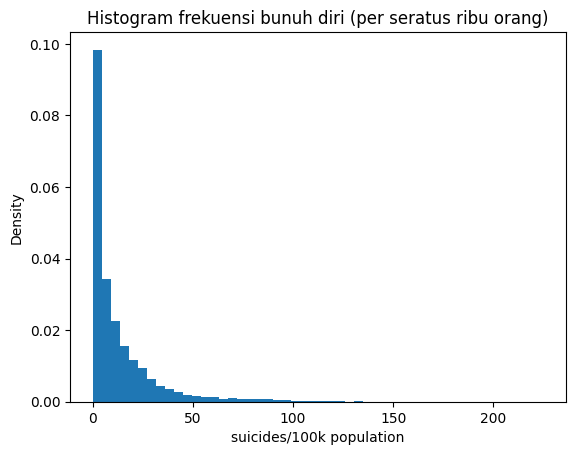

In [12]:
df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')
ax = df['suicides/100k pop'].plot.hist(bins=50, density=True)

ax.set_xlabel('suicides/100k population')
ax.set_ylabel('Density')
ax.set_title('Histogram frekuensi bunuh diri (per seratus ribu orang)')

plt.show()

Removing outliers

In [13]:
df=df.drop('HDI for year',axis = 1)
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[8],axis = 1)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

categorical_features=[0,2,3,7,8,9]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('cat', OneHotEncoder(),[0,2,3,7,8,9]),('num',MinMaxScaler(),[1,4,5,6])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [15]:
df

,﻿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2.156.624.900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2.156.624.900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2.156.624.900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2.156.624.900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2.156.624.900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,63.067.077.179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,63.067.077.179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,63.067.077.179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,63.067.077.179,2309,Generation Z


### Pie Diagram

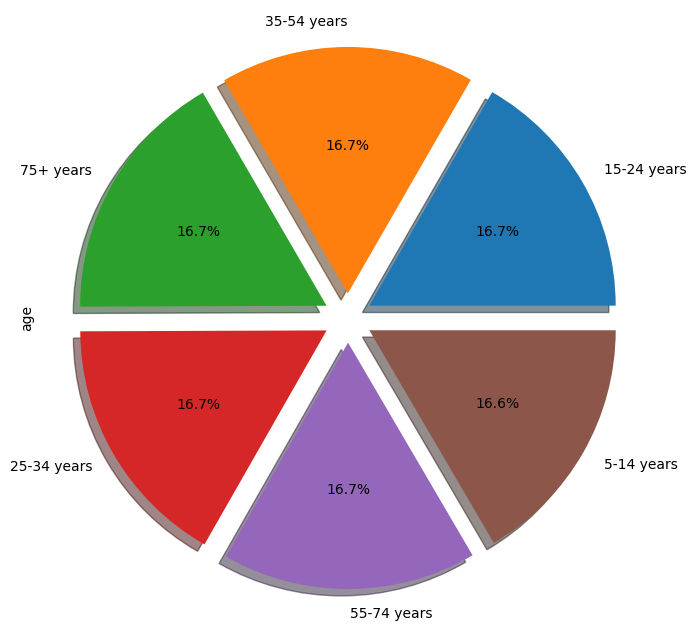

In [16]:
# Pandas plotting with matplotlib
df['age'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ﻿country            27820 non-null  object 
 1   year                27820 non-null  object 
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  object 
 5   population          27820 non-null  object 
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  object 
 10  generation          27820 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.5+ MB


In [18]:
df['year']=df['year'].astype(str).astype(int)
df['suicides_no']=df['suicides_no'].astype(str).astype(int)
df['population']=df['population'].astype(str).astype(int)
df['suicides/100k pop'] = df['suicides/100k pop'].astype(str).str.split('.').str[0].astype(int)
df['gdp_per_capita ($)']=df['gdp_per_capita ($)'].astype(str).astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ﻿country            27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6   suicides/100k pop   27820 non-null  int64 
 7   country-year        27820 non-null  object
 8    gdp_for_year ($)   27820 non-null  object
 9   gdp_per_capita ($)  27820 non-null  int64 
 10  generation          27820 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.5+ MB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


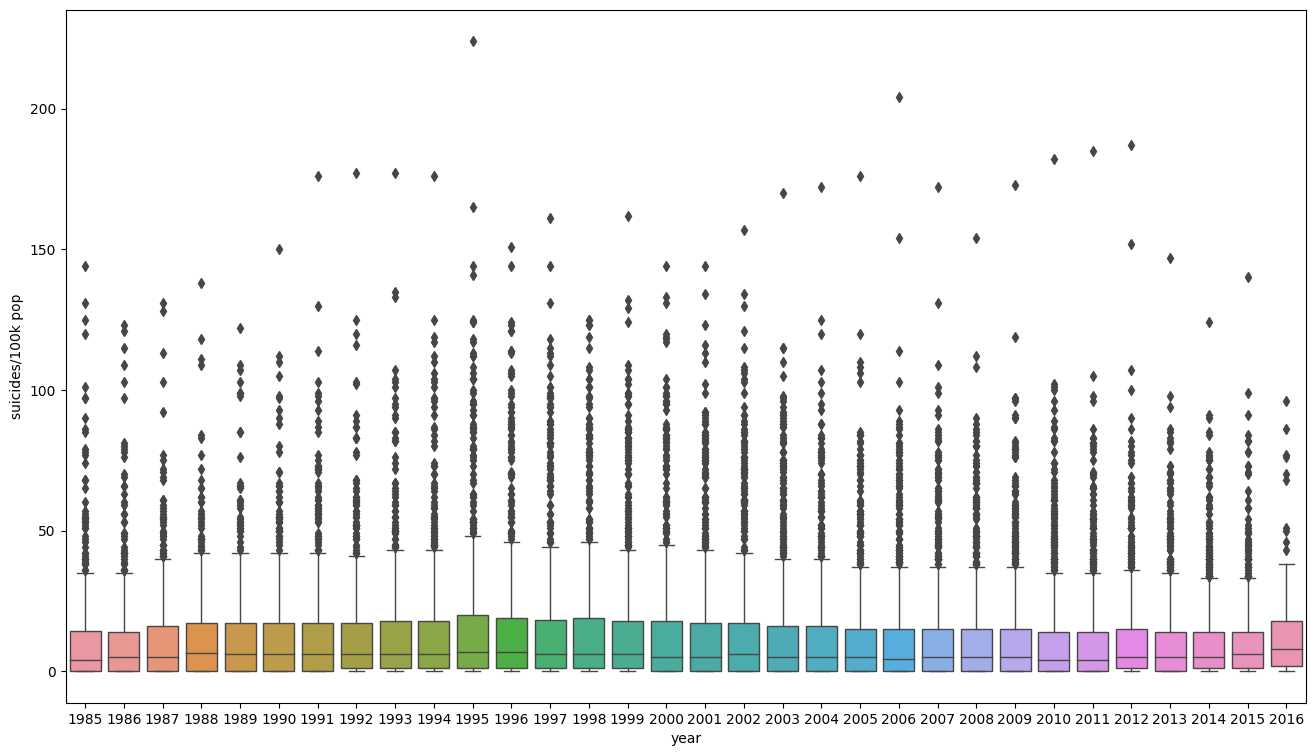

In [20]:
# Seaborn with Matplotlib
fig=plt.gcf()
fig.set_size_inches(16,9)
#fig=sns.boxplot(x='Age', y='Hours per week', data=df,order=['<50K','>=50K'], linewidth=2.5)
fig=sns.boxplot(x='year', y='suicides/100k pop', data=df, linewidth=1)

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

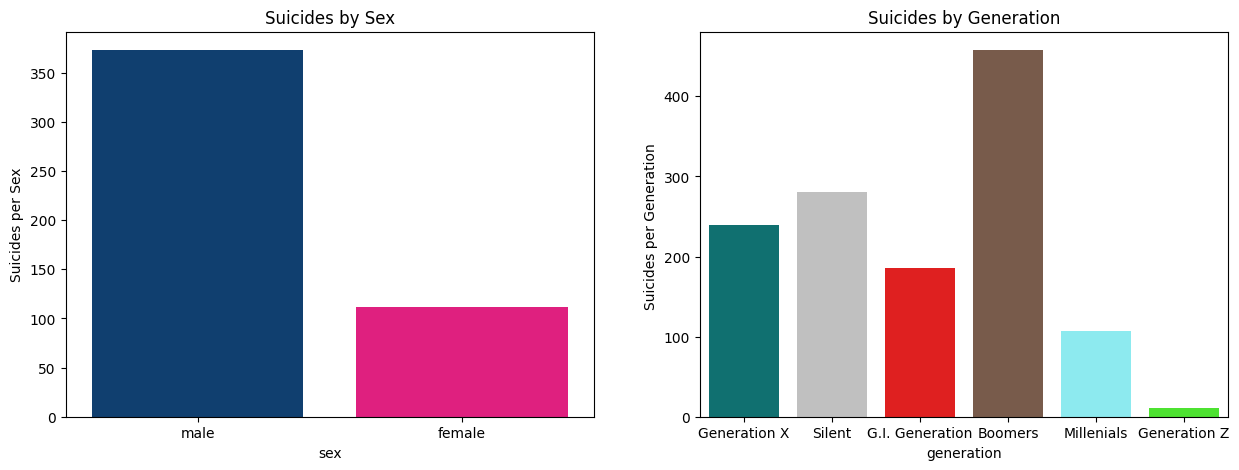

In [21]:
fig, axarr = plt.subplots(1, 2, figsize=(15,5))
#a = sns.countplot(df['Age'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Income count by Age')
axarr[0].set_title('Suicides by Sex')
axarr[1].set_title('Suicides by Generation')

a = sns.barplot(x='sex', y='suicides_no', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Suicides per Sex')
b = sns.barplot(x='generation', y='suicides_no', data=df, palette=('#008080','#c0c0c0', '#ff0000', '#805943', '#7df9ff', '#39ff14'), errorbar=None, ax=axarr[1]).set_ylabel('Suicides per Generation ')


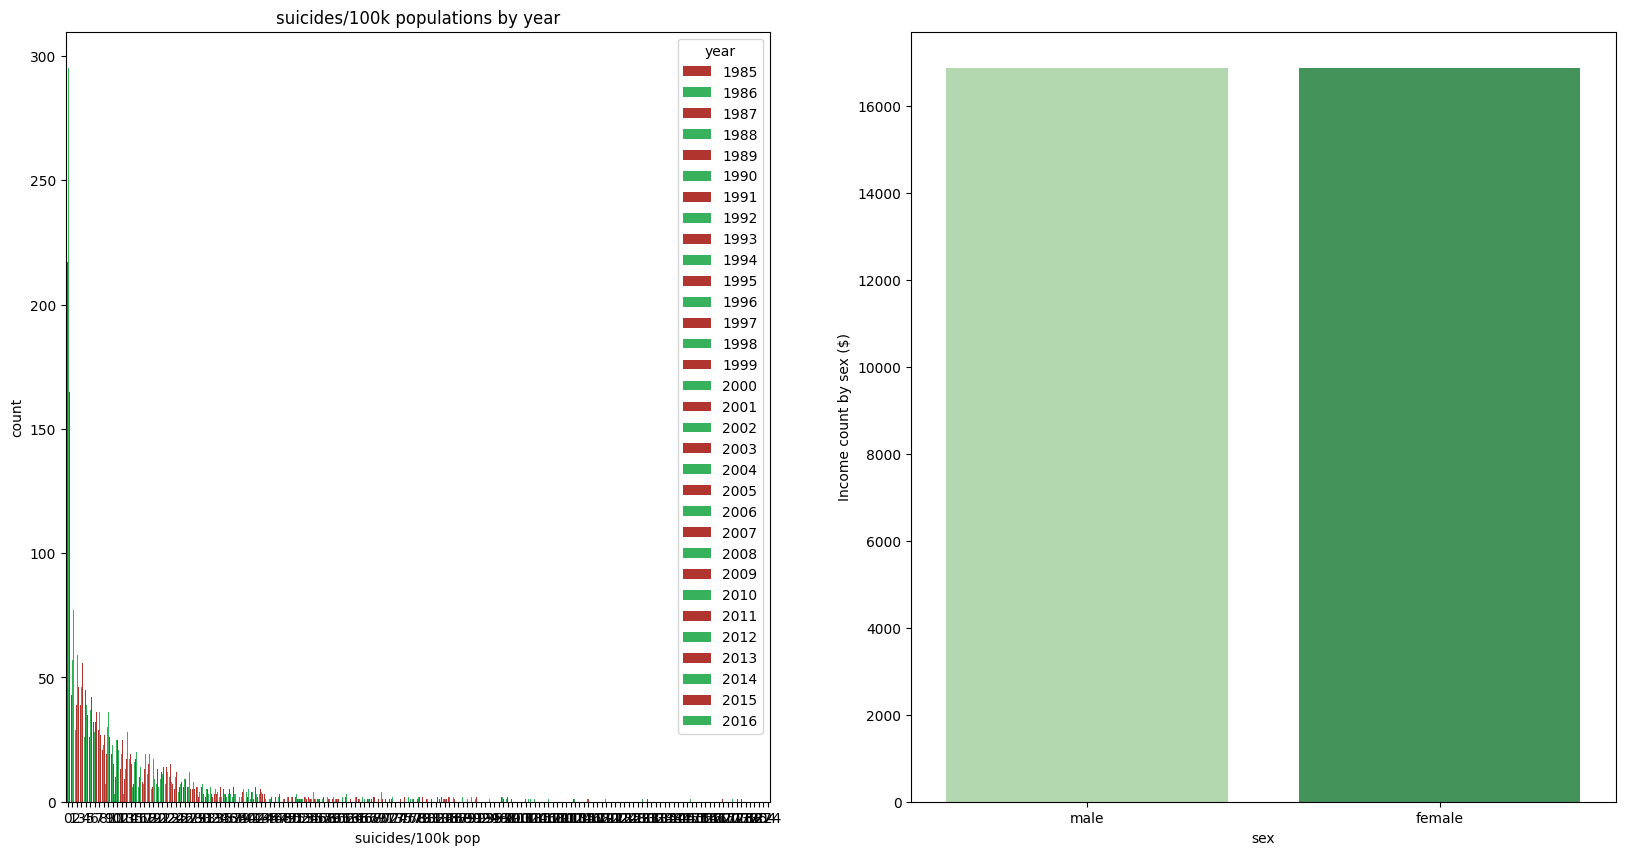

In [27]:
fig, axarr = plt.subplots(1,2,figsize=(20,10))
a = sns.countplot(x='suicides/100k pop', hue='year', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('suicides/100k populations by year')
b = sns.barplot(x='sex', y='gdp_per_capita ($)', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Income count by sex ($)')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [23]:
dataset = df.copy()
dataset.head()

,﻿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6,Albania1987,2.156.624.900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5,Albania1987,2.156.624.900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4,Albania1987,2.156.624.900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4,Albania1987,2.156.624.900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3,Albania1987,2.156.624.900,796,Boomers


In [24]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,﻿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,0,21,312900,6,0,726,796,2
1,Albania,1987,1,2,16,308000,5,0,726,796,5
2,Albania,1987,0,0,14,289700,4,0,726,796,2
3,Albania,1987,1,5,1,21800,4,0,726,796,1
4,Albania,1987,1,1,9,274300,3,0,726,796,0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ﻿country            27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  int64 
 3   age                 27820 non-null  int64 
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6   suicides/100k pop   27820 non-null  int64 
 7   country-year        27820 non-null  int64 
 8    gdp_for_year ($)   27820 non-null  int64 
 9   gdp_per_capita ($)  27820 non-null  int64 
 10  generation          27820 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 2.5+ MB
